In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [5]:
df.info() # to get information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [6]:
df.describe()

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


In [7]:
df.isnull().sum()

name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

In [8]:
df = df.dropna(subset=['price'])
df = df[df['price'] > 0]
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].median())
df['mileage'] = df['mileage'].fillna(df['mileage'].median())
df['doors'] = df['doors'].fillna(df['doors'].median())
df['fuel'] = df['fuel'].fillna('Unknown')
df['transmission'] = df['transmission'].fillna('Unknown')
df['body'] = df['body'].fillna('Unknown')
df['drivetrain'] = df['drivetrain'].fillna('Unknown')
df['engine'] = df['engine'].fillna('Unknown')
df['trim'] = df['trim'].fillna('Unknown')
df['exterior_color'] = df['exterior_color'].fillna('Unknown')
df['interior_color'] = df['interior_color'].fillna('Unknown')

In [9]:
print("\nAfter cleaning - missing values:")
print(df.isnull().sum())


After cleaning - missing values:
name               0
description       56
make               0
model              0
year               0
price              0
engine             0
cylinders          0
fuel               0
mileage            0
transmission       0
trim               0
body               0
doors              0
exterior_color     0
interior_color     0
drivetrain         0
dtype: int64


In [10]:
# 4. Basic cleaning — fill missing values properly
df = df.dropna(subset=['price'])                  # must have target
df = df[df['price'] > 1000]

In [11]:
for col in ['cylinders', 'mileage', 'doors']:
    df[col] = df[col].fillna(df[col].median())

# Categorical fills with 'Unknown'
cat_cols = ['fuel', 'transmission', 'body', 'drivetrain', 'trim', 'engine',
            'exterior_color', 'interior_color']
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')

In [12]:
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
name               0
description       56
make               0
model              0
year               0
price              0
engine             0
cylinders          0
fuel               0
mileage            0
transmission       0
trim               0
body               0
doors              0
exterior_color     0
interior_color     0
drivetrain         0
dtype: int64


In [13]:
features = ['year', 'mileage', 'cylinders', 'doors', 'make', 'fuel', 'body', 'drivetrain', 'transmission', 'trim']

In [14]:
X = df[features].copy()
y = np.log1p(df['price'])

In [15]:
X = pd.get_dummies(X, drop_first=True)

In [16]:
X = df[features].copy()
y = np.log1p(df['price'])

In [17]:
# Dummies (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
# 9. Predict
y_pred_log = model.predict(X_test)

In [21]:
# IMPORTANT: convert back to real dollars
y_pred = np.expm1(y_pred_log)          # exp(pred_log) - 1
y_actual = np.expm1(y_test)            # real prices

In [22]:
# 10. Results — now correct!
r2 = r2_score(y_actual, y_pred)
mae = mean_absolute_error(y_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))

print(f"R²: {r2:.4f}  (higher is better, 0.6–0.8 is decent here)")
print(f"MAE:  ${mae:,.0f}   (average $ error)")
print(f"RMSE: ${rmse:,.0f}")

R²: 0.7598  (higher is better, 0.6–0.8 is decent here)
MAE:  $5,004   (average $ error)
RMSE: $9,317


In [30]:
# Bonus: show some predictions vs actual
print("\nSome predictions vs actual (first 10):")
results = pd.DataFrame({
    'Actual': y_actual.round(0).astype(int),
    'Predicted': y_pred.round(0).astype(int)
})
print(results.head(10))


Some predictions vs actual (first 10):
     Actual  Predicted
201   83940      80667
556   51803      53810
176   56105      47731
952   37335      37255
66    28860      28990
505   22260      27710
768   29111      30357
561   60080      54214
614   42150      37980
160   45038      47523


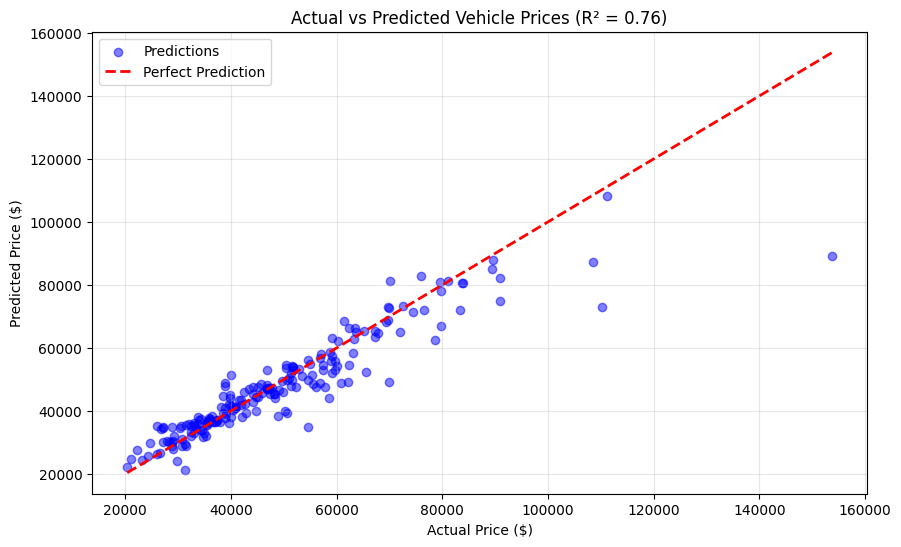

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_actual, y_pred, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted Vehicle Prices (R² = 0.76)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [45]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)

In [46]:
# 9. Predict
y_pred_log = model.predict(X_test)

In [47]:
r2 = r2_score(y_actual, y_pred)
mae = mean_absolute_error(y_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))

print(f"R²: {r2:.4f}  (higher is better, 0.6–0.8 is decent here)")
print(f"MAE:  ${mae:,.0f}   (average $ error)")
print(f"RMSE: ${rmse:,.0f}")

R²: 0.8408  (higher is better, 0.6–0.8 is decent here)
MAE:  $4,140   (average $ error)
RMSE: $7,585


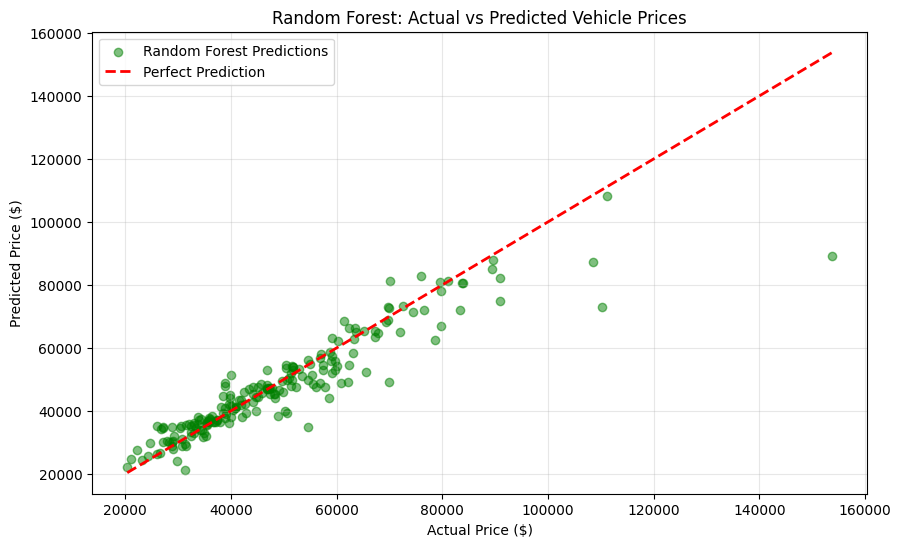

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_actual, y_pred, alpha=0.5, color='green', label='Random Forest Predictions')
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Random Forest: Actual vs Predicted Vehicle Prices')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [42]:
# Random Forest: Show some predictions vs actual (first 10)
print("\nSome predictions vs actual (first 10) - Random Forest:")
results_rf = pd.DataFrame({
    'Actual': y_actual[:10].round(0).astype(int),
    'Predicted': y_pred[:10].round(0).astype(int)
})
print(results_rf.head(10))


Some predictions vs actual (first 10) - Random Forest:
     Actual  Predicted
201   83940      80667
556   51803      53810
176   56105      47731
952   37335      37255
66    28860      28990
505   22260      27710
768   29111      30357
561   60080      54214
614   42150      37980
160   45038      47523


In [48]:
# RANDOM FOREST
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf_log = rf_model.predict(X_test)
y_pred_rf = np.expm1(y_pred_rf_log)  # Convert back from log

# Evaluate Random Forest
r2_rf = r2_score(y_actual, y_pred_rf)
print(f"Random Forest R²: {r2_rf:.4f}")

# Show RF predictions
results_rf = pd.DataFrame({
    'Actual': y_actual[:10].round(0).astype(int),
    'Predicted': y_pred_rf[:10].round(0).astype(int)  # Use y_pred_rf
})
print(results_rf.head(10))

Random Forest R²: 0.8408
     Actual  Predicted
201   83940      80667
556   51803      53810
176   56105      47731
952   37335      37255
66    28860      28990
505   22260      27710
768   29111      30357
561   60080      54214
614   42150      37980
160   45038      47523


In [49]:
# LINEAR REGRESSION
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr_log = lr_model.predict(X_test)
y_pred_lr = np.expm1(y_pred_lr_log)  # Convert back from log

# Evaluate Linear Regression
r2_lr = r2_score(y_actual, y_pred_lr)
print(f"Linear Regression R²: {r2_lr:.4f}")

# Show LR predictions
results_lr = pd.DataFrame({
    'Actual': y_actual[:10].round(0).astype(int),
    'Predicted': y_pred_lr[:10].round(0).astype(int)  # Use y_pred_lr
})
print(results_lr.head(10))

Linear Regression R²: 0.7598
     Actual  Predicted
201   83940      81492
556   51803      60245
176   56105      44464
952   37335      36416
66    28860      31744
505   22260      23560
768   29111      27936
561   60080      58822
614   42150      31922
160   45038      47290
